# Import Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing  import StandardScaler, MinMaxScaler, OrdinalEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
import pickle
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Preprocessing

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/SenyuminAja16/2-Faza-Grace/refs/heads/master/Data/asia_df.csv')
df.head(5)

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15:00,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Armenia,Yerevan,40.18,44.51,Asia/Yerevan,1715849100,2024-05-16 12:45:00,19.0,66.2,Partly cloudy,...,0.8,0.9,1,1,05:45 AM,08:12 PM,01:17 PM,02:31 AM,Waxing Gibbous,55
2,Azerbaijan,Baku,40.40,49.88,Asia/Baku,1715849100,2024-05-16 12:45:00,17.0,62.6,Partly cloudy,...,1.9,2.2,1,1,05:23 AM,07:51 PM,12:54 PM,02:10 AM,Waxing Gibbous,55
3,Bahrain,Manama,26.24,50.58,Asia/Bahrain,1715849100,2024-05-16 11:45:00,36.0,96.8,Sunny,...,39.0,114.3,2,4,04:50 AM,06:18 PM,12:10 PM,12:45 AM,Waxing Gibbous,55
4,Bangladesh,Dhaka,23.72,90.41,Asia/Dhaka,1715849100,2024-05-16 14:45:00,38.4,101.2,Partly Cloudy,...,49.7,57.0,3,6,05:16 AM,06:34 PM,12:28 PM,12:58 AM,Waxing Gibbous,55


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13650 entries, 0 to 13649
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       13650 non-null  object 
 1   location_name                 13650 non-null  object 
 2   latitude                      13650 non-null  float64
 3   longitude                     13650 non-null  float64
 4   timezone                      13650 non-null  object 
 5   last_updated_epoch            13650 non-null  int64  
 6   last_updated                  13650 non-null  object 
 7   temperature_celsius           13650 non-null  float64
 8   temperature_fahrenheit        13650 non-null  float64
 9   condition_text                13650 non-null  object 
 10  wind_mph                      13650 non-null  float64
 11  wind_kph                      13650 non-null  float64
 12  wind_degree                   13650 non-null  int64  
 13  w

In [5]:
missing_values = df.isna().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

## Eksplorasi

C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_19396\2467601596.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pollutant_means.values, y=pollutant_means.index, palette="Reds_r")


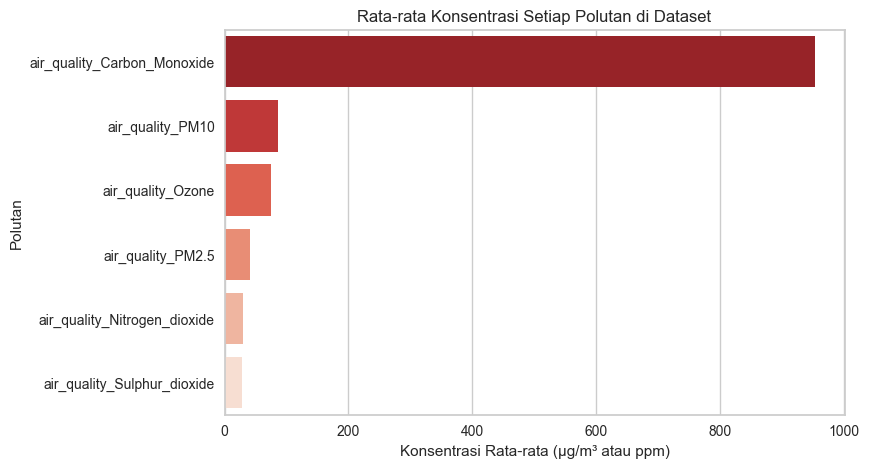

C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_19396\701364934.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_pollutants = df.set_index('last_updated').resample('M')[[


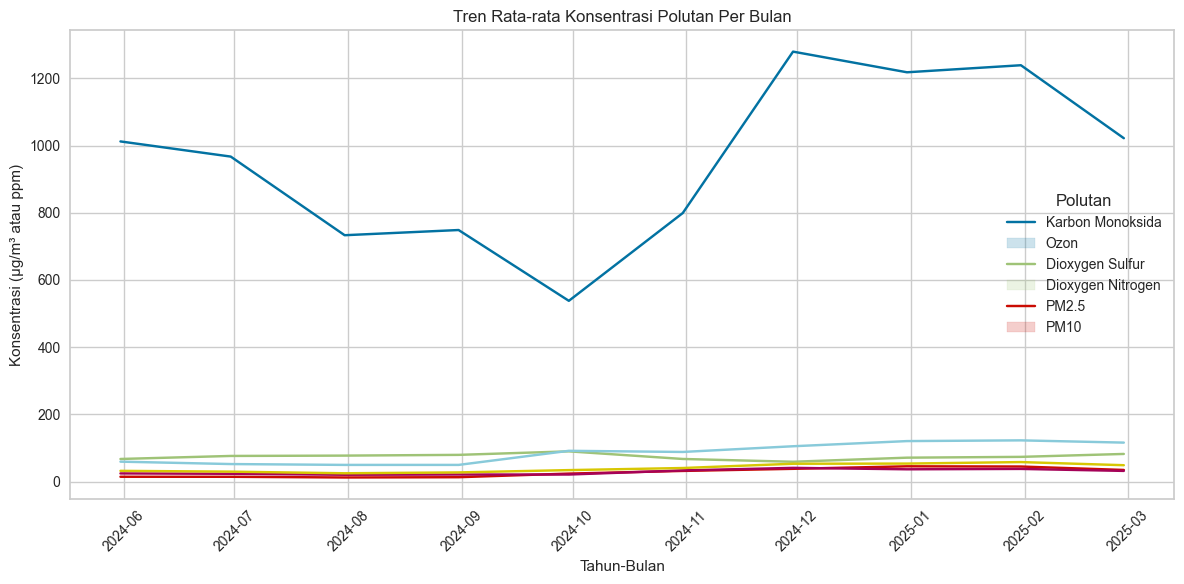

In [7]:
df["last_updated"] = pd.to_datetime(df["last_updated"])
monthly_pollutants = df.set_index('last_updated').resample('M')[[
    "air_quality_Carbon_Monoxide", "air_quality_Ozone", "air_quality_Sulphur_dioxide",
    "air_quality_Nitrogen_dioxide", "air_quality_PM2.5", "air_quality_PM10"
]].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_pollutants, dashes=False)
plt.title('Tren Rata-rata Konsentrasi Polutan Per Bulan')
plt.xlabel('Tahun-Bulan')
plt.ylabel('Konsentrasi (µg/m³ atau ppm)')
plt.xticks(rotation=45)
plt.legend(title='Polutan', labels=[
    "Karbon Monoksida", "Ozon", "Dioxygen Sulfur", "Dioxygen Nitrogen",
    "PM2.5", "PM10"
])
plt.tight_layout()
plt.show()


In [8]:
columns_to_drop = ["country", "location_name", "latitude", "longitude", "timezone", "last_updated_epoch", "last_updated", "sunrise", "sunset", "moonrise", "moonset", "moon_phase", "moon_illumination", 'condition_text', 'wind_direction', 'wind_degree', ]
df.drop(columns=columns_to_drop, inplace=True)
df.head(5)

,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,...,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index
0,26.6,79.8,8.3,13.3,1012.0,29.89,0.00,0.00,24,30,...,9.5,15.3,277.0,103.0,1.1,0.2,8.4,26.6,1,1
1,19.0,66.2,4.3,6.8,1017.0,30.03,0.13,0.01,40,25,...,6.2,9.9,186.9,103.0,1.0,0.3,0.8,0.9,1,1
2,17.0,62.6,4.3,6.8,1020.0,30.12,0.00,0.00,68,50,...,4.6,7.4,227.0,81.5,7.1,1.8,1.9,2.2,1,1
3,36.0,96.8,13.6,22.0,1007.0,29.74,0.00,0.00,33,0,...,18.1,29.2,397.2,100.1,18.5,9.7,39.0,114.3,2,4
4,38.4,101.2,4.3,6.8,1006.0,29.71,0.00,0.00,31,30,...,4.9,7.9,520.7,188.8,8.7,4.7,49.7,57.0,3,6


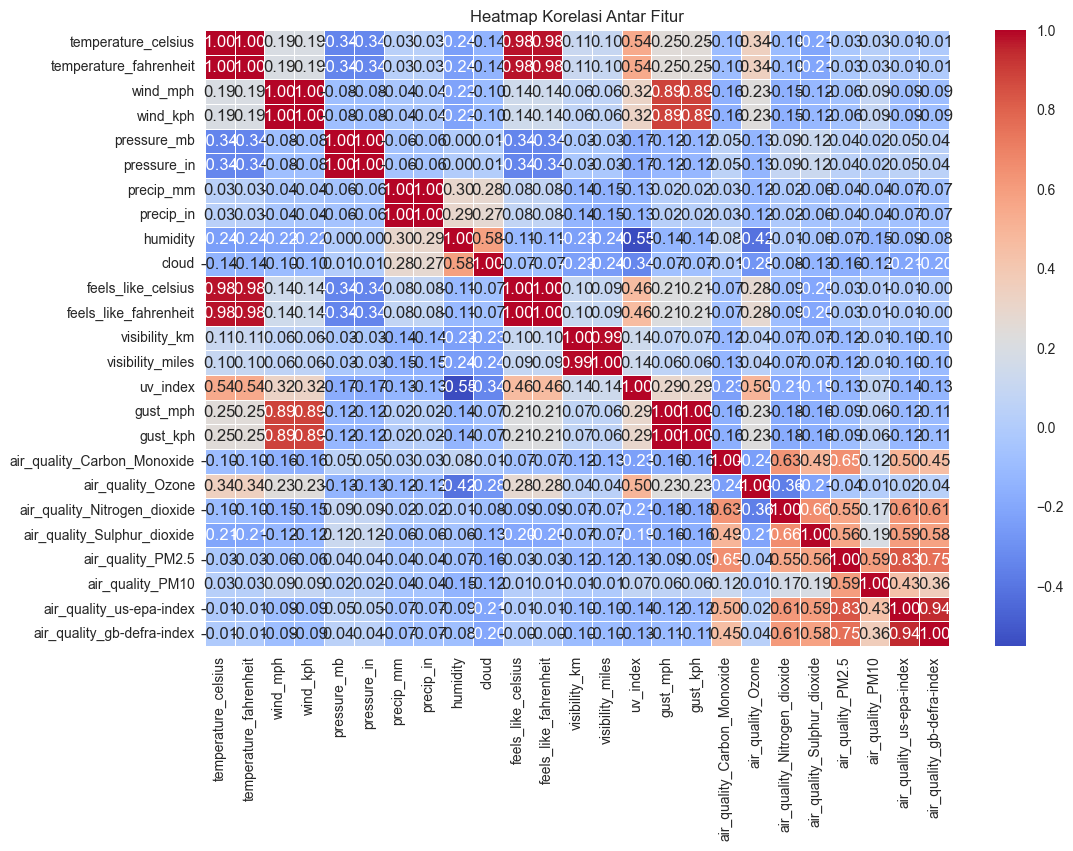

In [9]:
numeric_features = df.select_dtypes(include='number').columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

In [10]:
column_multikolinearitas = ['gust_mph', 'feels_like_fahrenheit', 'temperature_fahrenheit', 'air_quality_gb-defra-index', 'wind_mph', 'pressure_in', 'visibility_miles', 'precip_in', 'feels_like_celsius', 'precip_mm', 'air_quality_us-epa-index']
df.drop(columns=column_multikolinearitas, inplace=True)
df.head(5)

,temperature_celsius,wind_kph,pressure_mb,humidity,cloud,visibility_km,uv_index,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10
0,26.6,13.3,1012.0,24,30,10.0,7.0,15.3,277.0,103.0,1.1,0.2,8.4,26.6
1,19.0,6.8,1017.0,40,25,10.0,4.0,9.9,186.9,103.0,1.0,0.3,0.8,0.9
2,17.0,6.8,1020.0,68,50,10.0,5.0,7.4,227.0,81.5,7.1,1.8,1.9,2.2
3,36.0,22.0,1007.0,33,0,10.0,8.0,29.2,397.2,100.1,18.5,9.7,39.0,114.3
4,38.4,6.8,1006.0,31,30,10.0,9.0,7.9,520.7,188.8,8.7,4.7,49.7,57.0


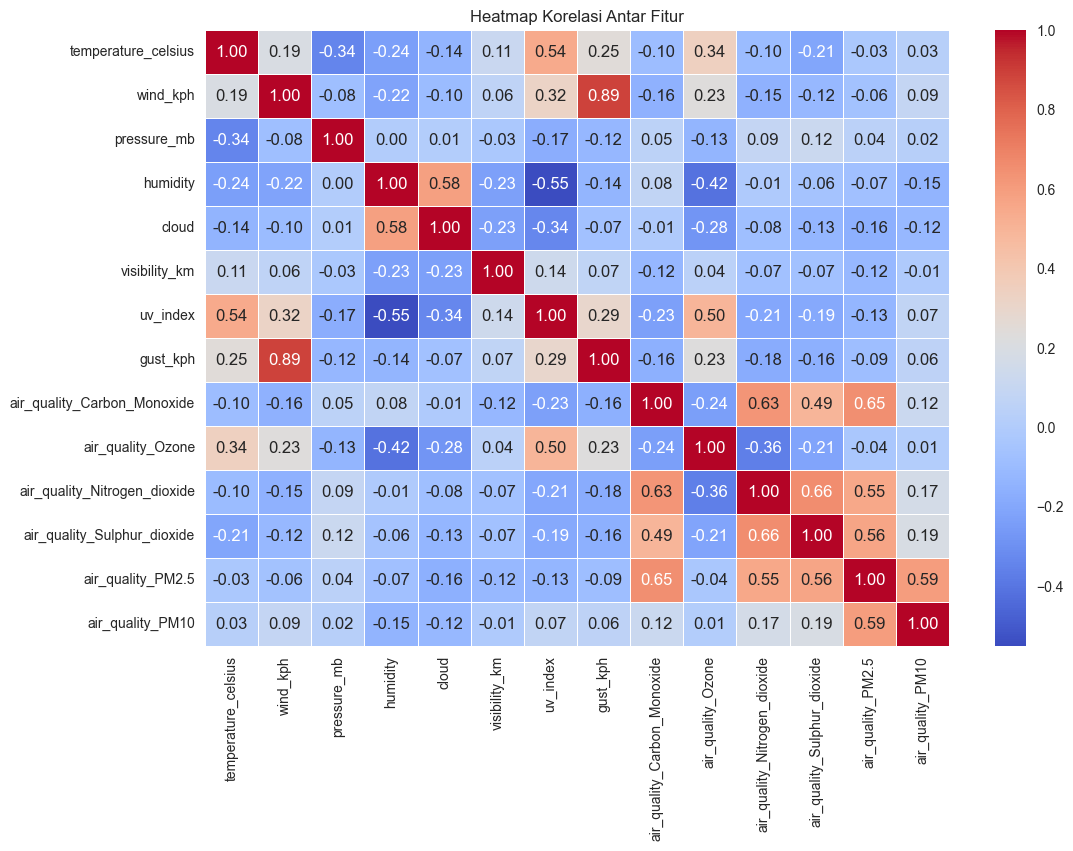

In [11]:
numeric_features = df.select_dtypes(include='number').columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

## Feature Engineering

In [12]:
df['pm_ratio'] = df['air_quality_PM2.5'] / (df['air_quality_PM10'] + 1e-5)

In [13]:
def categorize_wind(speed):
    if speed < 5:
        return "Low"
    elif 5 <= speed <= 15:
        return "Medium"
    else:
        return "High"

df['wind_condition'] = df['wind_kph'].apply(categorize_wind)

In [14]:
df['humidity_temperature_ratio'] = df['humidity'] / (df['temperature_celsius'] + 1e-5)

In [15]:
df['dew_point'] = df['temperature_celsius'] - ((100 - df['humidity']) / 5)

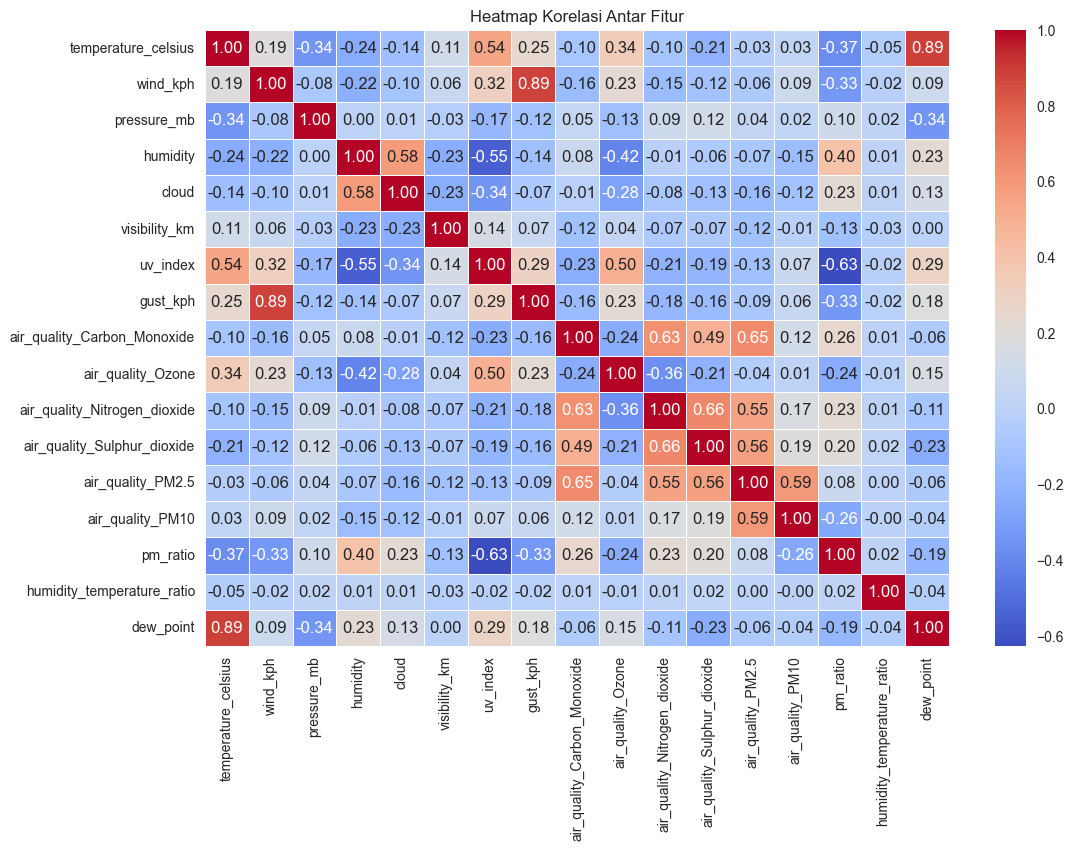

In [16]:
numeric_features = df.select_dtypes(include='number').columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

In [17]:
df.head()

,temperature_celsius,wind_kph,pressure_mb,humidity,cloud,visibility_km,uv_index,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,pm_ratio,wind_condition,humidity_temperature_ratio,dew_point
0,26.6,13.3,1012.0,24,30,10.0,7.0,15.3,277.0,103.0,1.1,0.2,8.4,26.6,0.315789,Medium,0.902255,11.4
1,19.0,6.8,1017.0,40,25,10.0,4.0,9.9,186.9,103.0,1.0,0.3,0.8,0.9,0.888879,Medium,2.105262,7.0
2,17.0,6.8,1020.0,68,50,10.0,5.0,7.4,227.0,81.5,7.1,1.8,1.9,2.2,0.863632,Medium,3.999998,10.6
3,36.0,22.0,1007.0,33,0,10.0,8.0,29.2,397.2,100.1,18.5,9.7,39.0,114.3,0.341207,High,0.916666,22.6
4,38.4,6.8,1006.0,31,30,10.0,9.0,7.9,520.7,188.8,8.7,4.7,49.7,57.0,0.871930,Medium,0.807291,24.6


In [18]:
column = ['air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Sulphur_dioxide', 'air_quality_Nitrogen_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'pm_ratio', 'wind_condition', 'humidity_temperature_ratio', 'dew_point']
df = df[column]

In [19]:
df = df[df['air_quality_PM10'] >= 0]

# Handling Outlier

In [20]:
df_without_outlier = df.copy()
numeric_features = df_without_outlier.select_dtypes(include='number').columns
q1 = df_without_outlier[numeric_features].quantile(0.25)
q3 = df_without_outlier[numeric_features].quantile(0.75)
IQR = q3 - q1

batas_bawah = q1 - 1.5 * IQR
batas_atas = q3 + 1.5 * IQR

for col in numeric_features:
    df_without_outlier[col] = df_without_outlier[col].apply(lambda x: batas_bawah[col] if x < batas_bawah[col] else batas_atas[col] if x > batas_atas[col] else x)

df_without_outlier


,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Sulphur_dioxide,air_quality_Nitrogen_dioxide,air_quality_PM2.5,air_quality_PM10,pm_ratio,wind_condition,humidity_temperature_ratio,dew_point
0,277.00,103.0,0.20,1.100,8.400,26.600,0.315789,Medium,0.902255,11.4
1,186.90,103.0,0.30,1.000,0.800,0.900,0.888879,Medium,2.105262,7.0
2,227.00,81.5,1.80,7.100,1.900,2.200,0.863632,Medium,3.999998,10.6
3,397.20,100.1,9.70,18.500,39.000,114.300,0.341207,High,0.916666,22.6
4,520.70,188.8,4.70,8.700,49.700,57.000,0.871930,Medium,0.807291,24.6
...,...,...,...,...,...,...,...,...,...,...
13645,490.25,69.0,19.24,64.380,26.270,37.555,0.699507,Low,5.476184,-2.4
13646,338.55,115.0,10.36,15.355,28.490,43.475,0.655319,High,2.511847,11.7
13647,516.15,79.0,5.92,11.285,5.735,5.920,0.968748,Medium,6.474230,-2.8
13648,1899.95,44.0,57.35,37.000,97.865,98.605,0.992495,Low,4.476742,12.6


In [21]:
numeric_features = df_without_outlier.select_dtypes(include='number').columns
scaler = StandardScaler()
df_without_outlier[numeric_features] = scaler.fit_transform(df_without_outlier[numeric_features])

In [22]:
category_features = df_without_outlier.select_dtypes(include='object').columns
categories = [['Low', 'Medium', 'High']]
encoder = OrdinalEncoder(categories=categories)
df_without_outlier[category_features] = encoder.fit_transform(df_without_outlier[category_features])

## Standardilisasi & Label Encoder

In [23]:
numeric_features = df.select_dtypes(include='number').columns
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [24]:
# with open("scaler.pkl", "wb") as f:
#     pickle.dump(scaler, f)

In [25]:
category_features = df.select_dtypes(include='object').columns
categories = [['Low', 'Medium', 'High']]
encoder = OrdinalEncoder(categories=categories)
df[category_features] = encoder.fit_transform(df[category_features])

In [26]:
# with open("encoder.pkl", "wb") as f:
#     pickle.dump(encoder, f)

In [27]:
df

,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Sulphur_dioxide,air_quality_Nitrogen_dioxide,air_quality_PM2.5,air_quality_PM10,pm_ratio,wind_condition,humidity_temperature_ratio,dew_point
0,-0.398371,0.578599,-0.697199,-0.772190,-0.600001,-0.225669,-1.437955,1.0,-0.021714,-0.308507
1,-0.451405,0.578599,-0.694714,-0.774898,-0.740402,-0.321482,0.944264,1.0,-0.021706,-0.714013
2,-0.427802,0.136487,-0.657445,-0.609713,-0.720081,-0.316635,0.839319,1.0,-0.021694,-0.382235
3,-0.327621,0.518966,-0.461161,-0.301006,-0.034701,0.101289,-1.332298,2.0,-0.021714,0.723690
4,-0.254929,2.342935,-0.585391,-0.566385,0.162969,-0.112333,0.873809,1.0,-0.021715,0.908011
...,...,...,...,...,...,...,...,...,...,...
13645,-0.272852,-0.120555,-0.224130,0.941401,-0.269873,-0.184827,0.157083,0.0,-0.021684,-1.580321
13646,-0.362143,0.825359,-0.444763,-0.386171,-0.228861,-0.162756,-0.026598,2.0,-0.021704,-0.280859
13647,-0.257607,0.085079,-0.555079,-0.496385,-0.649233,-0.302767,1.276265,1.0,-0.021617,-1.617185
13648,0.783398,-0.634638,0.722752,0.199964,1.052762,0.042776,1.374976,0.0,-0.021690,-0.197914


# Modeling

## K-Means

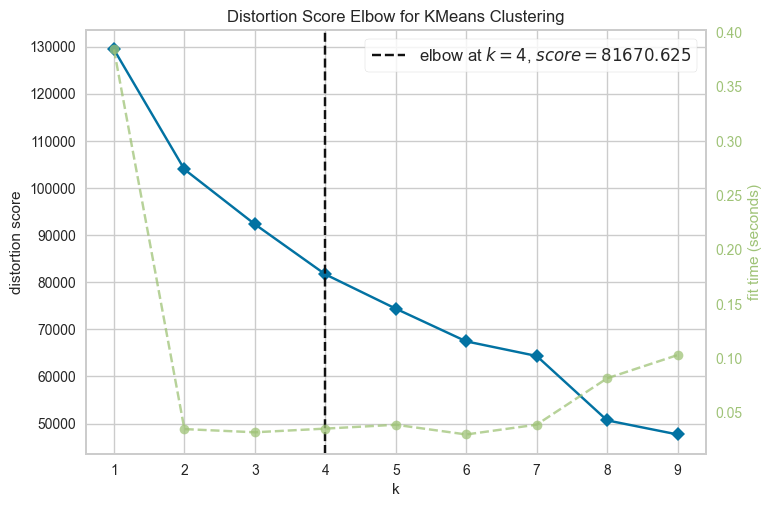

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(df)
visualizer.show()

In [29]:
k = 4
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init=10)
kmeans.fit(df)
labels_kmeans = kmeans.labels_

In [30]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=500, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(df)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("n_clusters={0}, silhouette score {1}".format(num_clusters, silhouette_avg))

n_clusters=2, silhouette score 0.4049724178888042
n_clusters=3, silhouette score 0.18182692049854512
n_clusters=4, silhouette score 0.18511095947321654
n_clusters=5, silhouette score 0.19627727591218536
n_clusters=6, silhouette score 0.1961049395444156
n_clusters=7, silhouette score 0.20595917452514237
n_clusters=8, silhouette score 0.20566721429128643


In [31]:
sil_score = silhouette_score(df_without_outlier, labels_kmeans)
print(f'Silhouette Score: {sil_score:.2f}')

Silhouette Score: 0.12


In [32]:
dbi = davies_bouldin_score(df, labels_kmeans)
print(f"Davies-Bouldin Index (K-Means): {dbi:.2f}")

Davies-Bouldin Index (K-Means): 1.26


In [33]:
ch_index = calinski_harabasz_score(df, labels_kmeans)
print(f"Calinski-Harabasz Index (K-Means): {ch_index:.2f}")


Calinski-Harabasz Index (K-Means): 2873.02


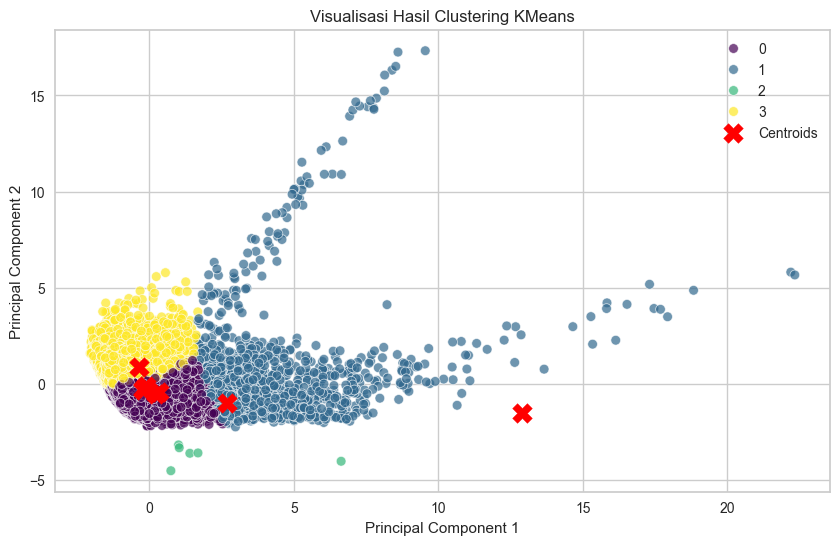

In [34]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels_kmeans, palette="viridis", alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Visualisasi Hasil Clustering KMeans')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

## DBSCAN

In [35]:
# from itertools import product
# import numpy as np

# eps_values = np.arange(0.1, 2.0, 0.1)
# min_samples_values = range(3, 10)
# desired_n_clusters = 3
# best_eps, best_min_samples, best_clusters = None, None, None

# for eps, min_samples in product(eps_values, min_samples_values):
#     dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#     labels = dbscan.fit_predict(df)
    
#     n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    
#     if n_clusters == desired_n_clusters:
#         best_eps, best_min_samples, best_clusters = eps, min_samples, n_clusters
#         break

# print(f"Nilai eps: {best_eps}, min_samples: {best_min_samples}, jumlah cluster: {best_clusters}")


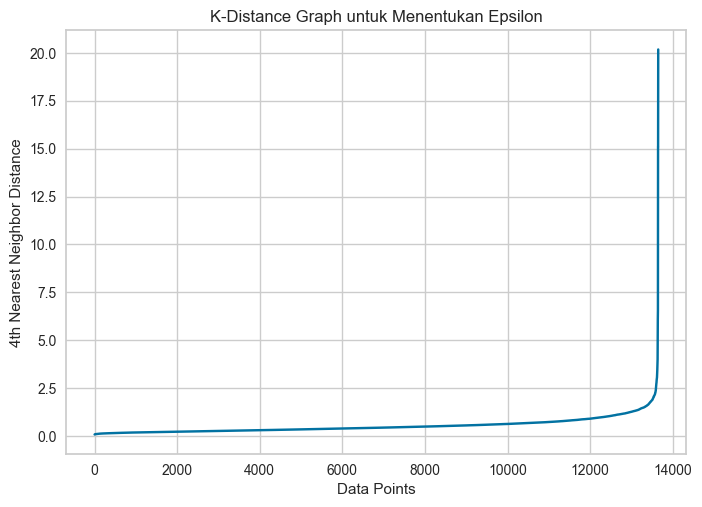

In [36]:
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(df)
distances, indices = neigh.kneighbors(df)
distances = np.sort(distances[:, 4], axis=0)

plt.plot(distances)
plt.xlabel("Data Points")
plt.ylabel("4th Nearest Neighbor Distance")
plt.title("K-Distance Graph untuk Menentukan Epsilon")
plt.show()

In [37]:
db = DBSCAN(eps=2.3, min_samples=20)
db.fit(df)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels_dbscan = db.labels_

['y', 'b', 'g', 'r']


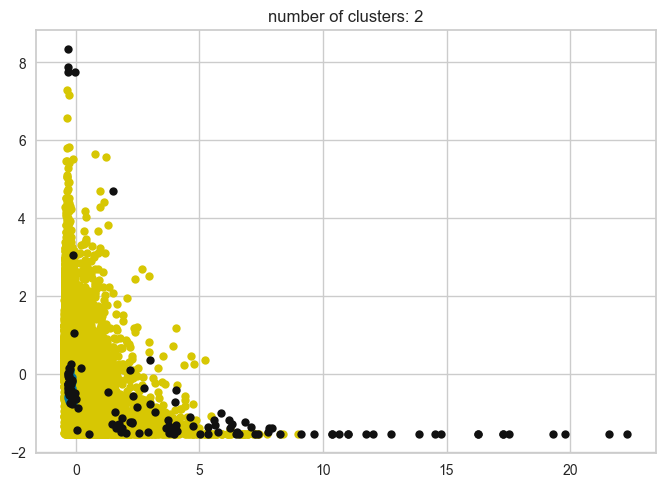

In [38]:
n_clusters_ = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
unique_labels = set(labels_dbscan)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'

    class_member_mask = (labels_dbscan == k)
    xy = df[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
    xy = df[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

In [39]:
def analyze_clusters_dbscan(X, labels, feature_names):
    unique_clusters = set(labels)
    
    print('Analisis Karakteristik Setiap Cluster:\n')

    for cluster_id in unique_clusters:
        if cluster_id == -1:
            print('--- Cluster Noise (Outlier) ---')
        else:
            print(f'--- Cluster {cluster_id} ---')

        cluster_data = X[labels == cluster_id]
        
        if len(cluster_data) == 0:
            print('Cluster kosong.\n')
            continue

        mean_values = cluster_data.mean(axis=0)

        for feature, mean_val in zip(feature_names, mean_values):
            print(f'{feature}: {mean_val:.2f}')
        print('\n')

analyze_clusters_dbscan(df, labels_dbscan, numeric_features)


Analisis Karakteristik Setiap Cluster:

--- Cluster 0 ---
air_quality_Carbon_Monoxide: -0.04
air_quality_Ozone: 0.01
air_quality_Sulphur_dioxide: -0.03
air_quality_Nitrogen_dioxide: -0.02
air_quality_PM2.5: -0.05
air_quality_PM10: -0.05
pm_ratio: 0.00
humidity_temperature_ratio: 1.15
dew_point: -0.02


--- Cluster 1 ---
air_quality_Carbon_Monoxide: -0.21
air_quality_Ozone: -0.34
air_quality_Sulphur_dioxide: 0.81
air_quality_Nitrogen_dioxide: 0.66
air_quality_PM2.5: 4.67
air_quality_PM10: 11.58
pm_ratio: -2.37
humidity_temperature_ratio: 1.79
dew_point: -0.02


--- Cluster Noise (Outlier) ---
air_quality_Carbon_Monoxide: 4.55
air_quality_Ozone: -0.60
air_quality_Sulphur_dioxide: 3.32
air_quality_Nitrogen_dioxide: 2.60
air_quality_PM2.5: 5.44
air_quality_PM10: 4.55
pm_ratio: -0.02
humidity_temperature_ratio: 0.99
dew_point: 2.43




In [40]:
sil_score = silhouette_score(df, labels_dbscan)
print(f'Silhouette Score: {sil_score:.2f}')

Silhouette Score: 0.74


In [41]:
dbi = davies_bouldin_score(df, labels_dbscan)
print(f"Davies-Bouldin Index (DBSCAN): {dbi:.2f}")

Davies-Bouldin Index (DBSCAN): 1.41


In [42]:
ch_index = calinski_harabasz_score(df, labels_dbscan)
print(f"Calinski-Harabasz Index (DBSCAN): {ch_index:.2f}")

Calinski-Harabasz Index (DBSCAN): 825.10


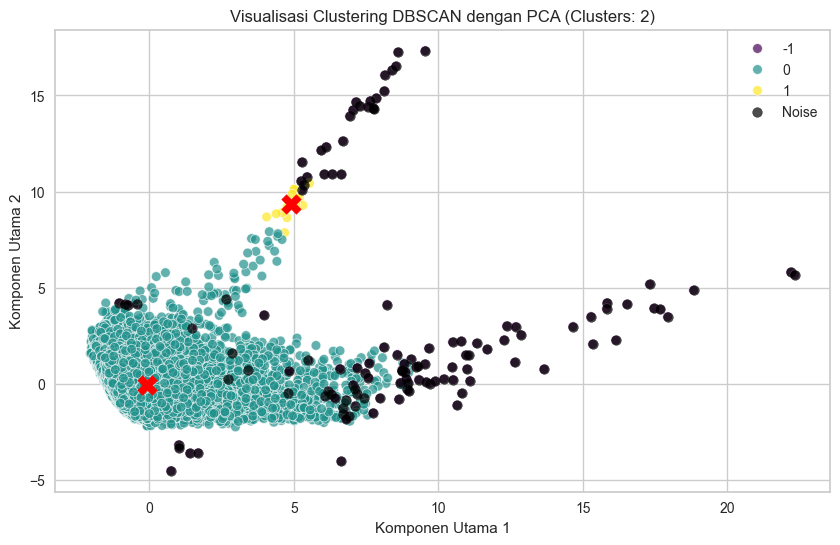

In [43]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

reduced_data = pca.fit_transform(df)
reduced_df = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
reduced_df['cluster'] = labels_dbscan 

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='cluster', 
    palette='viridis', data=reduced_df, alpha=0.7
)
plt.scatter(
    reduced_df[reduced_df['cluster'] == -1]['PCA1'], 
    reduced_df[reduced_df['cluster'] == -1]['PCA2'], 
    color='black', label='Noise', alpha=0.7
)

for cluster_id in set(labels_dbscan):
    if cluster_id != -1: 
        cluster_data = reduced_df[reduced_df['cluster'] == cluster_id]
        centroid = cluster_data[['PCA1', 'PCA2']].mean() 
        plt.scatter(centroid['PCA1'], centroid['PCA2'], color='red', s=200, marker='X')

plt.title(f'Visualisasi Clustering DBSCAN dengan PCA (Clusters: {len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)})')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend()
plt.show()

## Hierarchial

In [44]:
# plt.figure(figsize=(12, 6))
# linkage_matrix = linkage(df, method='ward')
# dendrogram(linkage_matrix, labels=df.index, leaf_rotation=90, leaf_font_size=8)
# plt.title("Dendrogram untuk Hierarchical Clustering")
# plt.xlabel("Data Points")
# plt.ylabel("Jarak")
# plt.show()

In [45]:
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward' )
agg_clustering.fit(df)
labels_hieararchial = agg_clustering.labels_

In [46]:
def analyze_clusters_hierarchical(X, labels, feature_names):
    unique_clusters = np.unique(labels)
    
    print('Analisis Karakteristik Setiap Cluster:\n')

    for cluster_id in unique_clusters:
        print(f'--- Cluster {cluster_id} ---')

        cluster_data = X[labels == cluster_id]
        
        if len(cluster_data) == 0:
            print('Cluster kosong.\n')
            continue

        mean_values = cluster_data.mean(axis=0)

        for feature, mean_val in zip(feature_names, mean_values):
            print(f'{feature}: {mean_val:.2f}')
        print('\n')

analyze_clusters_hierarchical(df.values, labels_hieararchial, numeric_features)

Analisis Karakteristik Setiap Cluster:

--- Cluster 0 ---
air_quality_Carbon_Monoxide: -0.13
air_quality_Ozone: 0.04
air_quality_Sulphur_dioxide: -0.10
air_quality_Nitrogen_dioxide: -0.13
air_quality_PM2.5: -0.12
air_quality_PM10: -0.07
pm_ratio: -0.02
humidity_temperature_ratio: 1.16
dew_point: -0.02


--- Cluster 1 ---
air_quality_Carbon_Monoxide: 3.21
air_quality_Ozone: -1.02
air_quality_Sulphur_dioxide: 2.34
air_quality_Nitrogen_dioxide: 2.99
air_quality_PM2.5: 2.21
air_quality_PM10: 0.42
pm_ratio: 0.58
humidity_temperature_ratio: 0.91
dew_point: 0.01


--- Cluster 2 ---
air_quality_Carbon_Monoxide: 0.24
air_quality_Ozone: -0.53
air_quality_Sulphur_dioxide: 0.97
air_quality_Nitrogen_dioxide: 0.54
air_quality_PM2.5: -0.06
air_quality_PM10: -0.16
pm_ratio: 0.82
humidity_temperature_ratio: 0.33
dew_point: 46.54


--- Cluster 3 ---
air_quality_Carbon_Monoxide: -0.23
air_quality_Ozone: -0.30
air_quality_Sulphur_dioxide: 0.79
air_quality_Nitrogen_dioxide: 0.55
air_quality_PM2.5: 5.70
air

In [47]:
sil_score = silhouette_score(df, labels_hieararchial)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.5436


In [48]:
dbi = davies_bouldin_score(df, labels_hieararchial)
print(f"Davies-Bouldin Index: {dbi:.2f}")

Davies-Bouldin Index: 0.74


In [49]:
ch_index = calinski_harabasz_score(df, labels_hieararchial)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Calinski-Harabasz Index: 2264.46


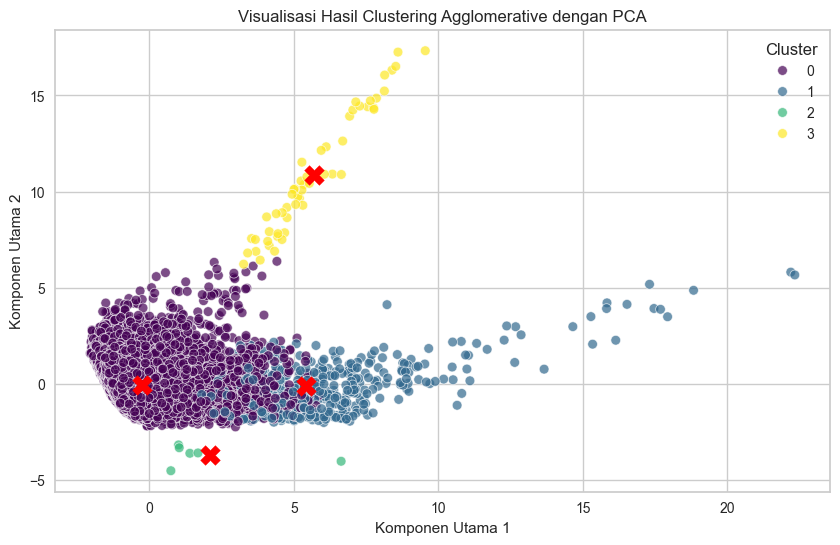

In [50]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

reduced_df = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
reduced_df['cluster'] = labels_hieararchial 

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='cluster', 
    palette='viridis', data=reduced_df, alpha=0.7
)

centroids = reduced_df.groupby('cluster')[['PCA1', 'PCA2']].mean()
for cluster_id, centroid in centroids.iterrows():
    plt.scatter(centroid['PCA1'], centroid['PCA2'], color='red', s=200, marker='X')

plt.title(f'Visualisasi Hasil Clustering Agglomerative dengan PCA')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend(title='Cluster')
plt.show()

# Resampling untuk deploy

In [51]:
df['cluster'] = labels_hieararchial
df['cluster'].value_counts()

cluster
0    13042
1      548
3       53
2        6
Name: count, dtype: int64

In [52]:
category_features = df.select_dtypes(include='object')
numeric_features = df.select_dtypes(include='number').drop(columns=['cluster'], errors='ignore')

# 2. Standarisasi fitur numerik sebelum resampling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_features)  # Jangan lupa transformasi!

# 3. Lakukan resampling pada data awal (tanpa cluster)
smote = SMOTE(sampling_strategy='auto', random_state=42)  
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)  

X_resampled, y_resampled = smote.fit_resample(X_scaled, df['cluster'])  # Gunakan cluster sebagai target
X_resampled, y_resampled = undersample.fit_resample(X_resampled, y_resampled)

# 4. Buat kembali DataFrame hasil resampling
df_resampled = pd.DataFrame(X_resampled, columns=numeric_features.columns)  # Pastikan jumlah kolom sama

# 5. Gabungkan kembali dengan fitur kategori (Gunakan indeks yang baru)
df_resampled = pd.concat([df_resampled, category_features.iloc[:len(df_resampled)].reset_index(drop=True)], axis=1)

df_resampled

,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Sulphur_dioxide,air_quality_Nitrogen_dioxide,air_quality_PM2.5,air_quality_PM10,pm_ratio,wind_condition,humidity_temperature_ratio,dew_point
0,-0.398371,0.578599,-0.697199,-0.772190,-0.600001,-0.225669,-1.437955,-0.216721,-0.021714,-0.308507
1,-0.451405,0.578599,-0.694714,-0.774898,-0.740402,-0.321482,0.944264,-0.216721,-0.021706,-0.714013
2,-0.427802,0.136487,-0.657445,-0.609713,-0.720081,-0.316635,0.839319,-0.216721,-0.021694,-0.382235
3,-0.327621,0.518966,-0.461161,-0.301006,-0.034701,0.101289,-1.332298,1.227627,-0.021714,0.723690
4,-0.254929,2.342935,-0.585391,-0.566385,0.162969,-0.112333,0.873809,-0.216721,-0.021715,0.908011
...,...,...,...,...,...,...,...,...,...,...
52163,-0.121915,-0.545170,0.609109,0.346293,5.027195,12.311867,-2.366749,1.227627,-0.021708,-1.220276
52164,-0.154256,-0.137821,0.337367,0.207437,6.342173,15.548600,-2.375629,1.143830,-0.021711,-1.109486
52165,-0.207715,-0.108995,0.572677,0.431648,3.386204,9.080851,-2.381146,1.227627,-0.021713,-1.173071
52166,-0.140201,-0.294048,0.780780,0.693102,3.401535,8.727073,-2.365326,-0.216721,-0.021712,-1.046367


In [53]:
df_resampled

,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Sulphur_dioxide,air_quality_Nitrogen_dioxide,air_quality_PM2.5,air_quality_PM10,pm_ratio,wind_condition,humidity_temperature_ratio,dew_point
0,-0.398371,0.578599,-0.697199,-0.772190,-0.600001,-0.225669,-1.437955,-0.216721,-0.021714,-0.308507
1,-0.451405,0.578599,-0.694714,-0.774898,-0.740402,-0.321482,0.944264,-0.216721,-0.021706,-0.714013
2,-0.427802,0.136487,-0.657445,-0.609713,-0.720081,-0.316635,0.839319,-0.216721,-0.021694,-0.382235
3,-0.327621,0.518966,-0.461161,-0.301006,-0.034701,0.101289,-1.332298,1.227627,-0.021714,0.723690
4,-0.254929,2.342935,-0.585391,-0.566385,0.162969,-0.112333,0.873809,-0.216721,-0.021715,0.908011
...,...,...,...,...,...,...,...,...,...,...
52163,-0.121915,-0.545170,0.609109,0.346293,5.027195,12.311867,-2.366749,1.227627,-0.021708,-1.220276
52164,-0.154256,-0.137821,0.337367,0.207437,6.342173,15.548600,-2.375629,1.143830,-0.021711,-1.109486
52165,-0.207715,-0.108995,0.572677,0.431648,3.386204,9.080851,-2.381146,1.227627,-0.021713,-1.173071
52166,-0.140201,-0.294048,0.780780,0.693102,3.401535,8.727073,-2.365326,-0.216721,-0.021712,-1.046367


In [54]:
# plt.figure(figsize=(12, 6))
# linkage_matrix = linkage(df_resampled, method='ward')
# dendrogram(linkage_matrix, labels=df_resampled.index, leaf_rotation=90, leaf_font_size=8)
# plt.title("Dendrogram untuk Hierarchical Clustering")
# plt.xlabel("Data Points")
# plt.ylabel("Jarak")
# plt.show()

In [55]:
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward' )
agg_clustering.fit(df_resampled)
labels_hieararchial = agg_clustering.labels_

In [57]:
sil_score = silhouette_score(df_resampled, labels_hieararchial)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.6139


In [58]:
dbi = davies_bouldin_score(df_resampled, labels_hieararchial)
print(f"Davies-Bouldin Index: {dbi:.2f}")

Davies-Bouldin Index: 0.59


In [59]:
ch_index = calinski_harabasz_score(df_resampled, labels_hieararchial)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Calinski-Harabasz Index: 395295.61


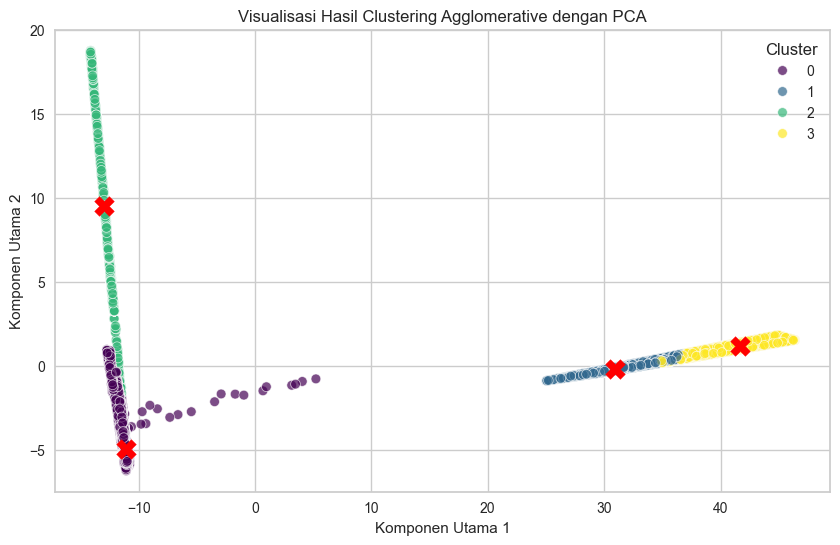

In [60]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_resampled)

reduced_df = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
reduced_df['cluster'] = labels_hieararchial 

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='cluster', 
    palette='viridis', data=reduced_df, alpha=0.7
)

centroids = reduced_df.groupby('cluster')[['PCA1', 'PCA2']].mean()
for cluster_id, centroid in centroids.iterrows():
    plt.scatter(centroid['PCA1'], centroid['PCA2'], color='red', s=200, marker='X')

plt.title(f'Visualisasi Hasil Clustering Agglomerative dengan PCA')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend(title='Cluster')
plt.show()

In [61]:
df_resampled.describe()

,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Sulphur_dioxide,air_quality_Nitrogen_dioxide,air_quality_PM2.5,air_quality_PM10,pm_ratio,wind_condition,humidity_temperature_ratio,dew_point
count,52168.000000,52168.000000,52168.000000,52168.000000,52168.000000,52168.000000,52168.000000,52168.000000,52168.000000,52168.000000
mean,0.765362,-0.450910,0.983746,0.975015,1.914193,3.430697,-0.238819,-0.149595,11.608225,-0.762760
std,2.100776,0.743173,1.653655,1.391540,2.807246,6.207600,1.391825,1.068973,20.365386,1.090186
min,-0.493137,-1.539426,-0.702168,-0.801977,-0.745944,-0.322973,-2.455401,-1.661069,-0.027899,-4.538670
25%,-0.274623,-0.943903,-0.195131,0.023948,-0.172584,-0.172195,-2.257645,-1.111291,-0.021712,-1.762563
50%,-0.143087,-0.456379,0.624027,0.638272,0.426021,-0.005504,0.402548,-0.216721,-0.021704,-0.889117
75%,1.056943,-0.111157,1.378374,1.627731,3.813695,7.222762,0.878237,1.227627,21.635237,0.297175
max,22.323146,8.345377,11.377478,10.779923,15.407586,22.182993,1.406172,1.227627,57.730166,1.562350


In [62]:
df.describe()

,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Sulphur_dioxide,air_quality_Nitrogen_dioxide,air_quality_PM2.5,air_quality_PM10,pm_ratio,wind_condition,humidity_temperature_ratio,dew_point,cluster
count,1.364900e+04,1.364900e+04,1.364900e+04,1.364900e+04,1.364900e+04,1.364900e+04,1.364900e+04,13649.000000,1.364900e+04,1.364900e+04,13649.000000
mean,-1.665863e-17,-9.162248e-17,-3.331727e-17,-3.331727e-17,6.663453e-17,4.164658e-17,-1.332691e-16,1.150048,-4.164658e-18,3.331727e-17,0.052678
std,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,0.692379,1.000037e+00,1.000037e+00,0.272187
min,-4.931367e-01,-1.539426e+00,-7.021678e-01,-8.019770e-01,-7.459440e-01,-3.229731e-01,-2.455401e+00,0.000000,-2.789917e-02,-4.538670e+00,0.000000
25%,-3.958993e-01,-7.148355e-01,-6.286235e-01,-7.099067e-01,-5.371895e-01,-2.551210e-01,-7.468121e-01,1.000000,-2.171274e-02,-6.034201e-01,0.000000
50%,-2.824165e-01,-7.942796e-02,-3.666221e-01,-4.162296e-01,-2.903790e-01,-1.745933e-01,9.945465e-02,1.000000,-2.170552e-02,2.905359e-01,0.000000
75%,-1.477839e-02,5.580359e-01,2.221047e-01,4.053623e-01,1.470817e-01,-1.722875e-02,8.738975e-01,2.000000,-2.169843e-02,8.250663e-01,0.000000
max,2.232315e+01,8.345377e+00,1.137748e+01,1.077992e+01,1.540759e+01,2.218299e+01,1.406172e+00,2.000000,5.773017e+01,1.562350e+00,3.000000


In [76]:

from scipy.stats import ks_2samp, ttest_ind
from sklearn.decomposition import PCA

# 1️⃣ Pisahkan Data Asli dan Data Sintetis
df_synthetic_2 = df_cluster_2_resampled.iloc[len(df_cluster_2):]  # Data sintetis dari SMOTE
df_synthetic_3 = df_cluster_3_resampled.iloc[len(df_cluster_3):]  # Data sintetis dari SMOTE

# Gabungkan semua data sintetis
df_synthetic = pd.concat([df_synthetic_2, df_synthetic_3])

# Gabungkan semua data asli (sebelum oversampling)
df_original = pd.concat([df_cluster_2, df_cluster_3])

print("Jumlah Data Asli:", len(df_original))
print("Jumlah Data Sintetis:", len(df_synthetic))

# 2️⃣ Bandingkan Statistik Deskriptif
print("\n📊 Statistik Data Asli:\n", df_original.describe())
print("\n📊 Statistik Data Sintetis:\n", df_synthetic.describe())

# 3️⃣ Visualisasi Histogram untuk Perbandingan Distribusi
for col in df_original.columns[:-1]:  # Exclude 'cluster' column
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df_original[col], label="Original", shade=True, color="blue")
    sns.kdeplot(df_synthetic[col], label="Synthetic", shade=True, color="red")
    plt.title(f"Distribusi Fitur: {col}")
    plt.legend()
    plt.show()

# 4️⃣ Uji Statistik
ks_results = {}
t_test_results = {}

for col in df_original.columns[:-1]:
    ks_stat, ks_p = ks_2samp(df_original[col], df_synthetic[col])
    t_stat, t_p = ttest_ind(df_original[col], df_synthetic[col], equal_var=False)
    
    ks_results[col] = {"KS Statistic": ks_stat, "P-Value": ks_p}
    t_test_results[col] = {"T-Statistic": t_stat, "P-Value": t_p}

# Tampilkan hasil uji Kolmogorov-Smirnov
print("\n📈 Hasil Kolmogorov-Smirnov Test (Apakah Distribusi Berbeda?):")
print(pd.DataFrame(ks_results).T)

# Tampilkan hasil T-Test
print("\n📉 Hasil T-Test (Apakah Rata-rata Berbeda?):")
print(pd.DataFrame(t_test_results).T)

# 5️⃣ PCA untuk Visualisasi Perbedaan
pca = PCA(n_components=2)
pca_original = pca.fit_transform(df_original.drop(columns=['cluster']))
pca_synthetic = pca.transform(df_synthetic.drop(columns=['cluster']))

plt.figure(figsize=(8, 6))
plt.scatter(pca_original[:, 0], pca_original[:, 1], alpha=0.5, label="Original Data", color="blue")
plt.scatter(pca_synthetic[:, 0], pca_synthetic[:, 1], alpha=0.5, label="Synthetic Data", color="red")
plt.title("PCA Scatter Plot: Data Asli vs Data Sintetis")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


NameError: name 'df_cluster_2_resampled' is not defined

In [ ]:
# x = df.drop(columns='cluster')
# y = df['cluster']

# smote = SMOTE(sampling_strategy={2: 500, 3: 500}, random_state=42)  # Target jumlah sampel minoritas
# undersample = RandomUnderSampler(sampling_strategy={0: 5000}, random_state=42)  # Target jumlah sampel mayoritas

# X_resampled, y_resampled = smote.fit_resample(x, y)
# X_resampled, y_resampled = undersample.fit_resample(X_resampled, y_resampled)

# # 1. Buat kembali DataFrame hasil resampling
# df_resampled = pd.DataFrame(X_resampled, columns=x.columns)  # X_resampled tanpa 'cluster'
# df_resampled['cluster'] = y_resampled  # Tambahkan label hasil resampling

# # 2. Cek distribusi setelah resampling
# print(df_resampled['cluster'].value_counts())



# Simpan Model

In [ ]:
# with open('KMeans_Kelompok2.pkl', 'wb') as file:
#     pickle.dump(kmeans, file)

In [ ]:
# with open('DBSCAN_Kelompok2.pkl', 'wb') as file:
#     pickle.dump(db, file)

In [ ]:
# with open('agg_clustering_Kelompok2.pkl', 'wb') as file:
#     pickle.dump(agg_clustering, file)

# Menyimpan Data dengan Cluster

In [ ]:
df_reserved = pd.DataFrame(scaler.inverse_transform(df[numeric_features]), columns=numeric_features)

ValueError: Boolean array expected for the condition, not float64

In [ ]:
df_reserved['wind_condition'] = encoder.inverse_transform(
    df[['wind_condition']].astype(int)
).ravel()

In [ ]:
df_reserved['cluster'] = labels_hieararchial

In [ ]:
df_reserved.head()


,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Sulphur_dioxide,air_quality_Nitrogen_dioxide,air_quality_PM2.5,air_quality_PM10,pm_ratio,humidity_temperature_ratio,dew_point,wind_condition,cluster
0,277.0,103.0,0.2,1.1,8.4,26.6,0.315789,0.902255,11.4,Medium,0
1,186.9,103.0,0.3,1.0,0.8,0.9,0.888879,2.105262,7.0,Medium,0
2,227.0,81.5,1.8,7.1,1.9,2.2,0.863632,3.999998,10.6,Medium,0
3,397.2,100.1,9.7,18.5,39.0,114.3,0.341207,0.916666,22.6,High,0
4,520.7,188.8,4.7,8.7,49.7,57.0,0.871930,0.807291,24.6,Medium,0


In [ ]:
# df_reserved.to_csv('Data dengan label hierarchial.csv', index=False)

## Kesimpulan Analisis hasil Cluster K-Means

### Kesimpulan Analisis Setiap Cluster Hasil Clustering KMeans

#### **Cluster 1**
- **Karakteristik Umum**: Cluster ini menunjukkan nilai tinggi pada polutan **Sulphur Dioxide** dan **Nitrogen Dioxide**, serta **PM2.5** dan **PM10**. Hal ini mengindikasikan adanya tingkat polusi udara yang cukup tinggi di cluster ini.
- **Air Quality**:
  - **Sulphur Dioxide**: Tinggi (+0.82), menunjukkan adanya polusi udara terkait dengan gas ini.
  - **Nitrogen Dioxide**: Positif (+0.59), menandakan tingkat polusi udara yang lebih tinggi akibat kendaraan bermotor atau industri.
- **PM**: **PM2.5** (5.29) dan **PM10** (12.61) juga menunjukkan tingkat partikulat yang lebih tinggi.
- **PM Ratio**: Sangat negatif (-2.35), menunjukkan ketidakseimbangan antara partikel PM2.5 dan PM10.
- **Humidity & Temperature**: **Humidity-Temperature Ratio** yang tinggi (1.71) dan **Dew Point** yang rendah (-0.02) menunjukkan kondisi kelembapan yang tidak begitu tinggi tetapi cukup sejuk.

#### **Cluster 2**
- **Karakteristik Umum**: Cluster ini menunjukkan nilai yang lebih rendah pada sebagian besar parameter kualitas udara dan partikulat, dengan **PM2.5** dan **PM10** yang lebih rendah daripada cluster lainnya. 
- **Air Quality**:
  - Nilai rendah untuk **Carbon Monoxide** (-0.11) dan **Ozone** (-0.30) menunjukkan kualitas udara yang relatif lebih baik.
  - **Sulphur Dioxide** dan **Nitrogen Dioxide** juga memiliki nilai yang rendah.
- **PM**: **PM2.5** (-0.24) dan **PM10** (-0.19) berada pada level yang lebih rendah, mencerminkan tingkat polusi udara yang lebih rendah dibandingkan dengan cluster lainnya.
- **PM Ratio**: Positif (0.51), menunjukkan distribusi partikulat PM2.5 dan PM10 yang lebih seimbang.
- **Humidity & Temperature**: **Humidity-Temperature Ratio** yang moderat (0.96) dan **Dew Point** yang sedikit lebih tinggi (0.01) menunjukkan keseimbangan antara suhu dan kelembapan.

#### **Cluster 3**
- **Karakteristik Umum**: Cluster ini memiliki kualitas udara yang bervariasi, dengan nilai tinggi pada **Ozone** dan nilai rendah pada **Sulphur Dioxide** dan **Nitrogen Dioxide**.
- **Air Quality**:
  - **Ozone** menunjukkan nilai yang tinggi (+0.74), sementara **Sulphur Dioxide** (-0.37) dan **Nitrogen Dioxide** (-0.45) menunjukkan tingkat yang lebih rendah.
- **PM**: **PM2.5** (-0.19) sangat rendah dan **PM10** (+0.04) mendekati nol, yang menunjukkan tingkat polusi udara yang rendah.
- **PM Ratio**: Nilai negatif (-1.04) yang menunjukkan ketidakseimbangan antara PM2.5 dan PM10.
- **Humidity & Temperature**: **Humidity-Temperature Ratio** (1.53) yang lebih tinggi menunjukkan tingkat kelembapan yang lebih besar, dan **Dew Point** yang sedikit negatif (-0.02).

#### **Cluster 4**
- **Karakteristik Umum**: Cluster ini memiliki kualitas udara yang buruk dengan nilai tinggi untuk **Carbon Monoxide**, **Sulphur Dioxide**, dan **Nitrogen Dioxide**.
- **Air Quality**:
  - **Carbon Monoxide** (+1.66), **Sulphur Dioxide** (+1.94), dan **Nitrogen Dioxide** (+1.99) menunjukkan tingkat polusi udara yang sangat tinggi.
  - **Ozone** (-0.69) sedikit lebih rendah, namun tetap menunjukkan kualitas udara yang buruk.
- **PM**: **PM2.5** (1.60) dan **PM10** (0.34) menunjukkan adanya polusi partikel yang lebih tinggi di area ini.
- **PM Ratio**: Positif (0.59), menunjukkan adanya distribusi yang relatif seimbang antara PM2.5 dan PM10.
- **Humidity & Temperature**: **Humidity-Temperature Ratio** (0.93) yang moderat dan **Dew Point** (0.02) yang sedikit lebih tinggi menunjukkan kondisi yang lebih hangat dan lembap.


## Kesimpulan Hasil Analisis clustering DBSCAN